In [1]:
using DataFrames, CSV, GraphPlot, Impute, Plots, Colors, Statistics, Random, Distributions, JLD

dir = "../Mariana-Paquete/Mariana-Basefunc/"

include(dir*"funciones_de_red.jl")
include(dir*"objetos.jl")
include(dir*"dinamica_conductores.jl")
include(dir*"animaciones.jl")

plot_digraph (generic function with 1 method)

In [2]:
# Parametros
tamano_red = 5;
doble_sentido = false;
center_h_dist = 0.5;
sd_h_dist = 0;
h_distribution = Normal(center_h_dist, sd_h_dist);
n_cars = 600;
ti = 0.0;
tf = 150.0;
max_n_dias = 10;
path_jld = "test.jld";
diag_start = [7.,160.];
pendiente = -pi/5;

In [3]:
red_cuadrada = create_square_network(tamano_red, both_ways=doble_sentido)
#red_cuadrada = make_div_del_norte(tamano_red, diag_start, pendiente, both_ways=doble_sentido);
SqNet= red_cuadrada.digraph;
m = nv(SqNet);
posarr = red_cuadrada.position_array;
city_mt = red_cuadrada.city_matrix;

In [4]:
saturation = city_mt[:,:,3]./city_mt[:,:,2];

In [5]:
maximum(filter(!isnan,saturation))

0.0

In [6]:
fig, colors = plot_digraph(SqNet, posarr, attribute_matrix=saturation,
                            separated_edges=true, min_value=0.0, max_value=1.0, c1=colorant"green", c2=colorant"red");

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [7]:
colors

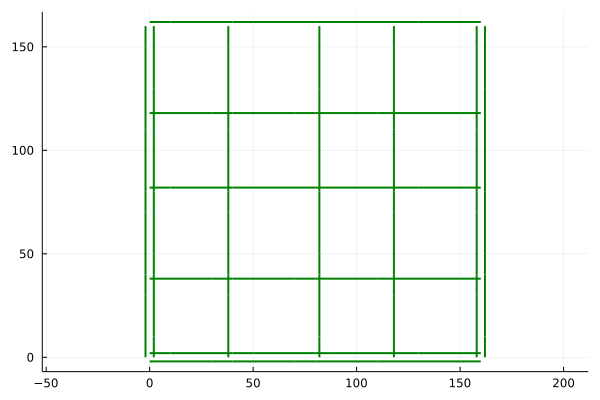

In [8]:
fig

In [9]:
# Generacion de los autos
autos = generate_autos(m,tamano_red,red_cuadrada,n_cars,ti,tf,h_distribution);
tiempos_de_salida_snapshot = [auto.ts for auto in autos];

In [10]:
times, vels, matrix_density, autos_atorados = simulacion!(0., red_cuadrada, autos);

In [11]:
saturation = matrix_density./city_mt[:,:,2];

In [12]:
fig, colors = plot_digraph(SqNet, posarr, attribute_matrix=saturation,
                        separated_edges=true, min_value=0, max_value=1.0, c1=colorant"green", c2=colorant"red");

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

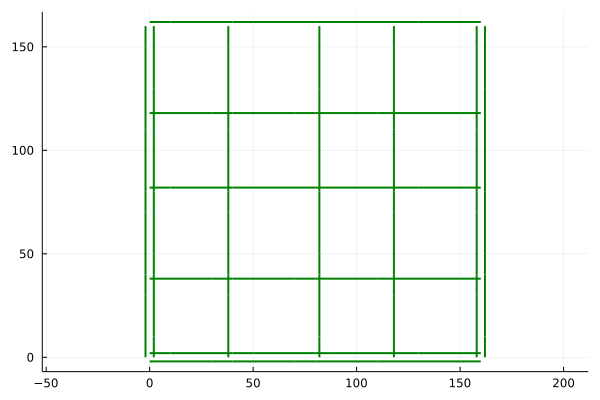

In [13]:
fig

In [17]:
valid_capacities = []
for e in collect(edges(SqNet))
    u = src(e)
    v = dst(e)
    push!(valid_capacities,city_mt[u,v,2])
end

minimum(valid_capacities)

2.0

In [18]:
autos_atorados

6667-element Array{Any,1}:
 [1.0, 0.0]
 [2.0, 0.0]
 [3.0, 0.0]
 [3.0, 0.0]
 [4.0, 0.0]
 [4.0, 0.0]
 [5.0, 0.0]
 [6.0, 0.0]
 [6.0, 0.0]
 [7.0, 0.0]
 [7.0, 0.0]
 [8.0, 0.0]
 [9.0, 0.0]
 ⋮
 [5.0, 0.0]
 [5.0, 0.0]
 [5.0, 0.0]
 [4.0, 0.0]
 [3.0, 0.0]
 [3.0, 0.0]
 [2.0, 0.0]
 [2.0, 0.0]
 [1.0, 0.0]
 [1.0, 0.0]
 [1.0, 0.0]
 [0.0, 0.0]

In [ ]:
# simulacion
day_simulacion = 0;

save(path_jld, "t", "test")

while day_simulacion < max_n_dias
    print("día $(day_simulacion) \n")
    times, vels, matrix_density = simulacion!(0., red_cuadrada, autos);
    vels_summ = vels_summary(autos)
    travel_times = times_summary(autos)
    indexes = restart(autos, red_cuadrada, tiempos_de_salida_snapshot)

    information_array = [vels_summ, travel_times, indexes, vels]
    break
    jldopen(path_jld, "r+") do file
        write(file, string("day", day_simulacion), information_array)
    end

    print(minimum(vels_summ)," ", mean(vels_summ),"\n")
    global day_simulacion += 1
end

# Read the file

In [ ]:
reads = load("test.jld");

In [ ]:
reads

In [ ]:
using StatsBase

In [ ]:
# Get daily speeds and daily means
days = 10
daily_speeds = [reads[string("day",i)][1] for i in 0:days-1];
daily_mean_speeds = [mean(daily_speeds[i]) for i in 1:days];
daily_mode_speeds = [StatsBase.modes(round.(daily_speeds[i],digits=2))[1] for i in 1:2];

# Get daily times and daily means
daily_times = [reads[string("day",i)][2] for i in 0:days-1];
daily_mean_times = [mean(daily_times[i]) for i in 1:days];
daily_mode_times = [StatsBase.modes(round.(daily_times[i],digits=2))[1] for i in 1:2];

In [ ]:
# Get daily indexes and daily means
daily_indexes = [reads[string("day",i)][3] for i in 0:days-1];
daily_mean_indexes = [mean(daily_indexes[i])  for i in 1:days if length(daily_indexes[i])>0];
daily_count_indexes = [length(daily_indexes[i]) for i in 1:2];

In [ ]:
# Get daily red speeds and means
daily_red_vels = [reads[string("day",i)][4] for i in 0:days-1];
daily_mean_red_vels = [mean(daily_red_vels[i]) for i in 1:days];
daily_count_red_vels = [length(daily_red_vels[i]) for i in 1:days];

In [ ]:
plot_digraph(SqNet, posarr, attribute_matrix=mean(daily_red_vels), separated_edges=true, c1 = colorant"green", c2 = colorant"red")

In [ ]:
histogram(daily_times[1])